##IMPORTING LIBRARIES


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##LOADING DATA

In [4]:
data= pd.read_csv("/content/drive/MyDrive/CLIMATE_CHANGE/climate_change_dataset.csv")

#**SCHEMA**

In [ ]:
data.head()

,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0
2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5
3,2010,Argentina,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7
4,2007,Germany,26.9,5.6,2.4,1743,124079175,12.5,4,17.4


In [ ]:
data.shape

(1000, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         1000 non-null   int64  
 1   Country                      1000 non-null   object 
 2   Avg Temperature (°C)         1000 non-null   float64
 3   CO2 Emissions (Tons/Capita)  1000 non-null   float64
 4   Sea Level Rise (mm)          1000 non-null   float64
 5   Rainfall (mm)                1000 non-null   int64  
 6   Population                   1000 non-null   int64  
 7   Renewable Energy (%)         1000 non-null   float64
 8   Extreme Weather Events       1000 non-null   int64  
 9   Forest Area (%)              1000 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 78.3+ KB


In [ ]:
data.describe()

,Year,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,2011.432000,19.883100,10.425800,3.009600,1738.761000,7.053830e+08,27.300500,7.291000,40.572000
std,7.147199,8.542897,5.614665,1.146081,708.976616,4.093910e+08,12.970808,4.422655,17.398998
min,2000.000000,5.000000,0.500000,1.000000,501.000000,3.660891e+06,5.100000,0.000000,10.100000
25%,2005.000000,12.175000,5.575000,2.000000,1098.750000,3.436242e+08,16.100000,3.000000,25.600000
50%,2012.000000,20.100000,10.700000,3.000000,1726.000000,7.131166e+08,27.150000,8.000000,41.150000
75%,2018.000000,27.225000,15.400000,4.000000,2362.500000,1.073868e+09,38.925000,11.000000,55.800000
max,2023.000000,34.900000,20.000000,5.000000,2999.000000,1.397016e+09,50.000000,14.000000,70.000000


In [ ]:
#CHECKING MISSING VALUES
missing_vals= data.isnull().sum()
print(missing_vals)

Year                           0
Country                        0
Avg Temperature (°C)           0
CO2 Emissions (Tons/Capita)    0
Sea Level Rise (mm)            0
Rainfall (mm)                  0
Population                     0
Renewable Energy (%)           0
Extreme Weather Events         0
Forest Area (%)                0
dtype: int64


In [ ]:
#CHECKING DUPLICATES
data.duplicated().sum()

np.int64(0)

In [7]:
#FINDING OUTLIERS

def outliers_IQR(df, column):

  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  return outliers

In [8]:
# Identify numerical columns (int64 and float64)
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Find and display outliers for each numerical column
for col in numerical_cols:
  outliers = outliers_IQR(data, col)
  if not outliers.empty:
    print(f"Outliers found in '{col}':")
    display(outliers)
  else:
    print(f"No outliers found in '{col}'.")

No outliers found in 'Year'.
No outliers found in 'Avg Temperature (°C)'.
No outliers found in 'CO2 Emissions (Tons/Capita)'.
No outliers found in 'Sea Level Rise (mm)'.
No outliers found in 'Rainfall (mm)'.
No outliers found in 'Population'.
No outliers found in 'Renewable Energy (%)'.
No outliers found in 'Extreme Weather Events'.
No outliers found in 'Forest Area (%)'.


#**EXPLORATORY DATA ANALYSIS**

In [5]:
df=pd.DataFrame(data)

In [9]:
df[numerical_cols].corr()

,Year,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
Year,1.000000,0.020954,0.041018,0.035433,-0.013638,0.071744,0.023826,-0.021620,-0.041327
Avg Temperature (°C),0.020954,1.000000,0.012323,0.059005,-0.004532,0.003550,-0.065472,0.034951,-0.017027
CO2 Emissions (Tons/Capita),0.041018,0.012323,1.000000,-0.038815,0.013306,0.011529,-0.023355,-0.004019,0.031387
Sea Level Rise (mm),0.035433,0.059005,-0.038815,1.000000,0.022104,-0.000277,0.003655,0.025003,-0.028670
Rainfall (mm),-0.013638,-0.004532,0.013306,0.022104,1.000000,0.009254,-0.005641,-0.006967,0.018571
Population,0.071744,0.003550,0.011529,-0.000277,0.009254,1.000000,0.001785,0.005175,-0.011638
Renewable Energy (%),0.023826,-0.065472,-0.023355,0.003655,-0.005641,0.001785,1.000000,0.000172,-0.021138
Extreme Weather Events,-0.021620,0.034951,-0.004019,0.025003,-0.006967,0.005175,0.000172,1.000000,-0.009291
Forest Area (%),-0.041327,-0.017027,0.031387,-0.028670,0.018571,-0.011638,-0.021138,-0.009291,1.000000




---




### 1. How have average global temperatures trended across regions over decades and which regions are heating fastest?

/tmp/ipython-input-1921443933.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda data: linregress(data['Year'], data['Avg Temperature (°C)']).slope)


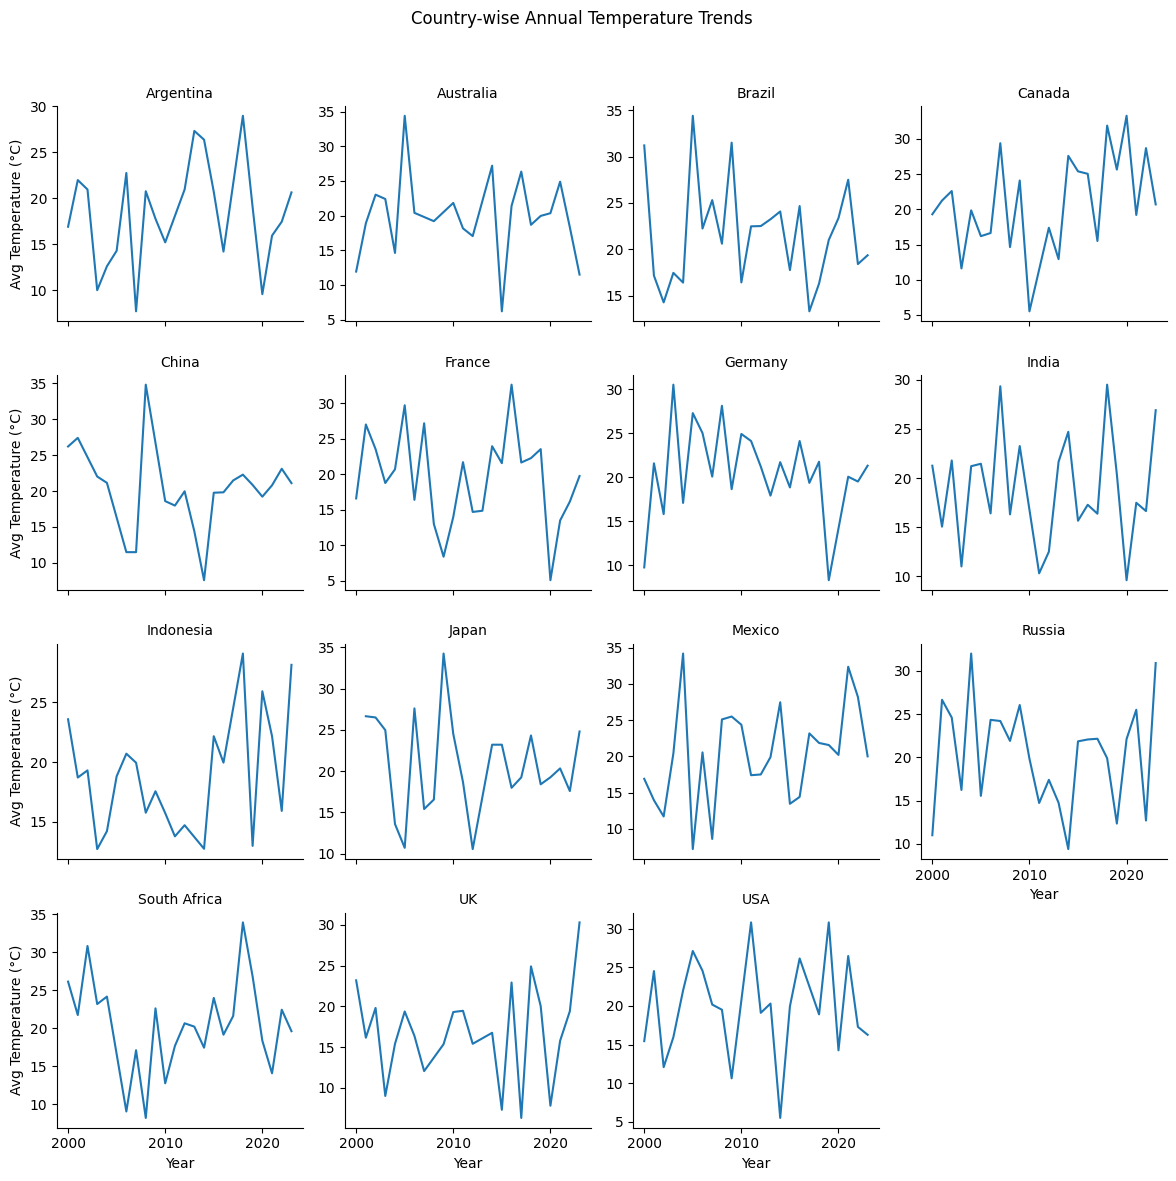

/tmp/ipython-input-1921443933.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Trend (°C/year)', y='Country', data=trend_rates.head(5), palette='Reds_r')


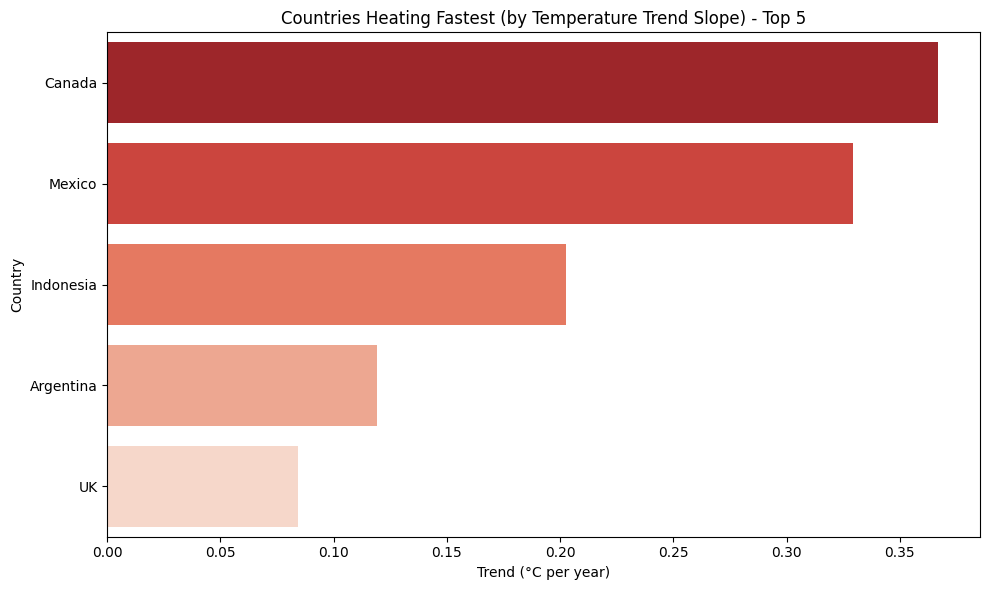

In [10]:
from scipy.stats import linregress

#country-year average temperature data
temp_trend = df.groupby(['Country', 'Year'])['Avg Temperature (°C)'].mean().reset_index()

# 2. Calculate trend slope (°C/year) per country using linear regression
trend_rates = (temp_trend.groupby('Country')
               .apply(lambda data: linregress(data['Year'], data['Avg Temperature (°C)']).slope)
               .sort_values(ascending=False)
               .reset_index(name='Trend (°C/year)'))

# Plot 1: Country-wise temperature trend small multiples
g = sns.FacetGrid(temp_trend, col="Country", col_wrap=4, height=3, sharey=False)
g.map_dataframe(sns.lineplot, x="Year", y="Avg Temperature (°C)")
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Avg Temperature (°C)")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Country-wise Annual Temperature Trends')
plt.show()

# Plot 2: Barplot of trend slopes to identify fastest-warming countries (Top 5)
plt.figure(figsize=(10, 6))
sns.barplot(x='Trend (°C/year)', y='Country', data=trend_rates.head(5), palette='Reds_r')
plt.title('Countries Heating Fastest (by Temperature Trend Slope) - Top 5')
plt.xlabel('Trend (°C per year)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()



---



### 2. How has the global mean sea level rise changed over the last 50 years?


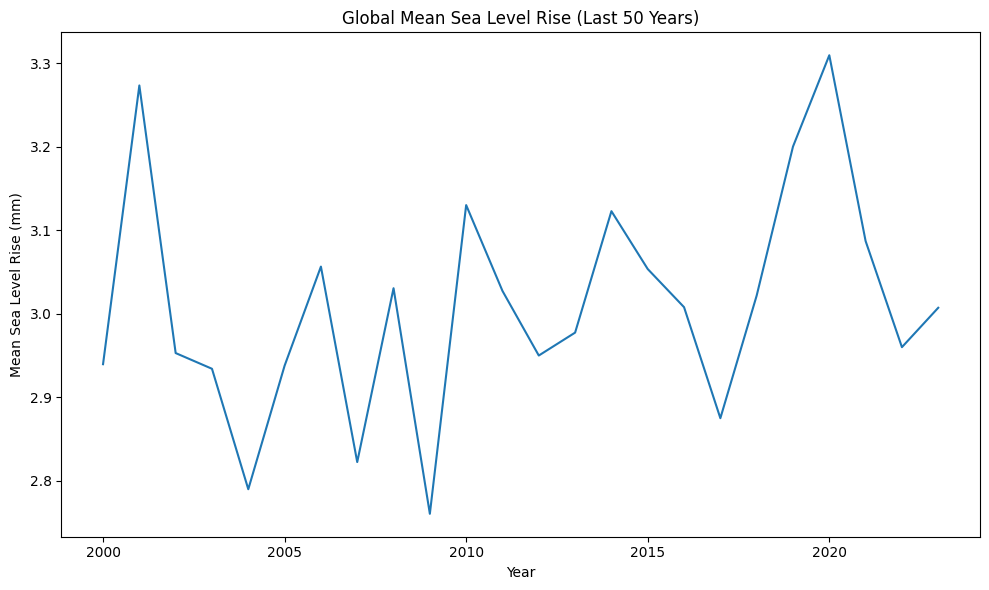

Estimated mean sea level rise rate: 0.005 mm per year


In [ ]:

# Group globally by year to get average sea level rise
global_sea_level = df.groupby('Year')['Sea Level Rise (mm)'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Sea Level Rise (mm)', data=global_sea_level)
plt.title("Global Mean Sea Level Rise (Last 50 Years)")
plt.xlabel("Year")
plt.ylabel("Mean Sea Level Rise (mm)")
plt.tight_layout()
plt.show()

# calculate rate of change
slope, intercept, *_ = linregress(global_sea_level['Year'], global_sea_level['Sea Level Rise (mm)'])
print(f"Estimated mean sea level rise rate: {slope:.3f} mm per year")


### 3. Which countries have experienced the highest frequency of extreme weather events in the last 20 years?


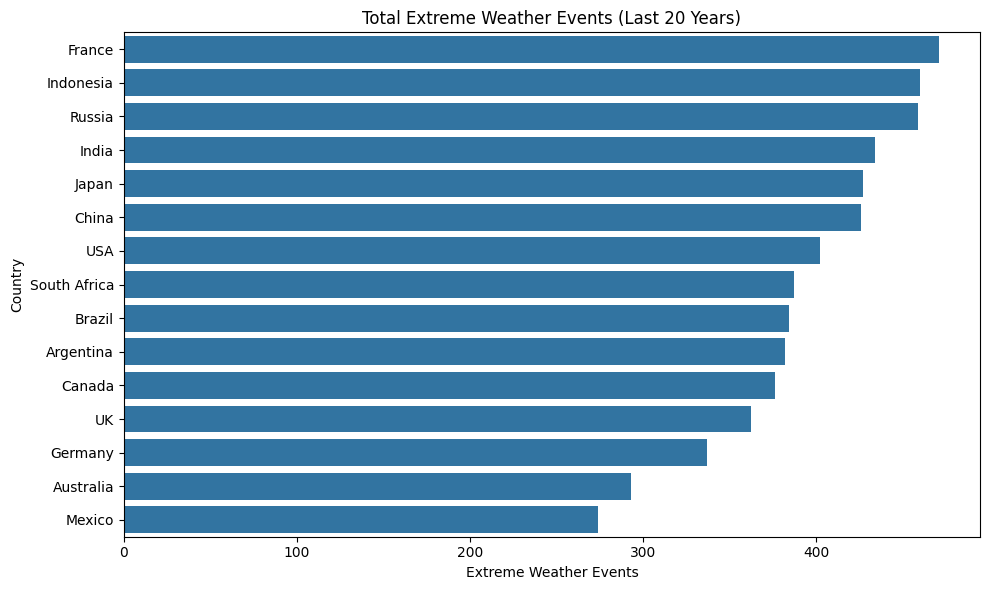

Top 5 countries with most extreme events in past 20 years:



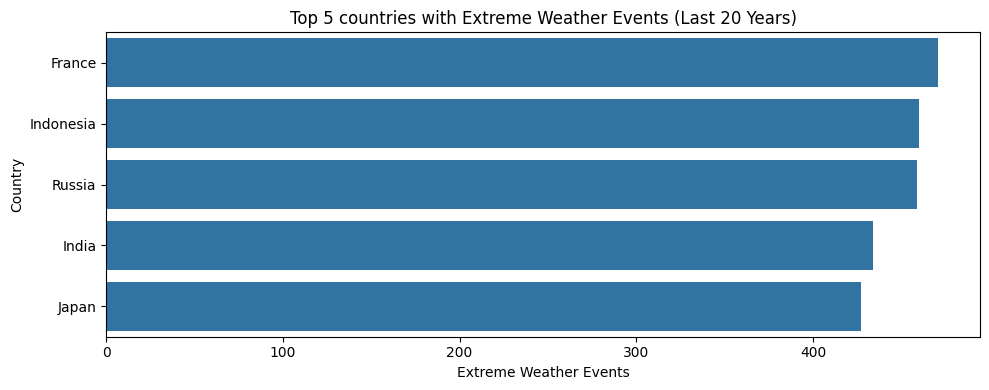

In [ ]:

recent_years = df['Year'].max() - 19         # Last 20 years
recent_data = df[df['Year'] >= recent_years]
event_counts = (recent_data.groupby('Country')['Extreme Weather Events']
                .sum()
                .sort_values(ascending=False)
                .reset_index())

plt.figure(figsize=(10,6))
sns.barplot(x='Extreme Weather Events', y='Country', data=event_counts, orient='h')
plt.title('Total Extreme Weather Events (Last 20 Years)')
plt.xlabel("Extreme Weather Events")
plt.ylabel("Country")
plt.tight_layout()
plt.show()



print("Top 5 countries with most extreme events in past 20 years:\n")
plt.figure(figsize=(10,4))
sns.barplot(x='Extreme Weather Events', y='Country', data=event_counts.head(5), orient='h')
plt.title('Top 5 countries with Extreme Weather Events (Last 20 Years)')
plt.xlabel("Extreme Weather Events")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


### 4. Relationship Between CO₂ Emissions Per Capita and Average Temperature Rise

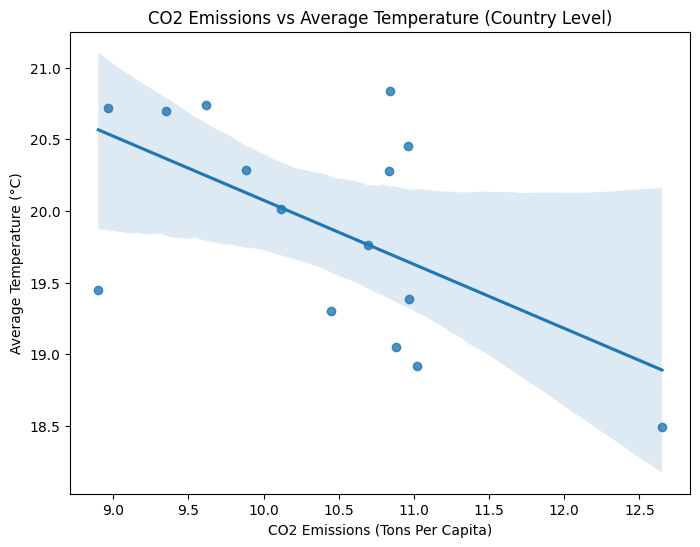

Pearson correlation: -0.573, p-value: 0.026


In [ ]:
from scipy.stats import pearsonr

# Aggregate average temperature per country (mean or trend)
country_avg_temp = df.groupby('Country')['Avg Temperature (°C)'].mean()
country_co2 = df.groupby('Country')['CO2 Emissions (Tons/Capita)'].mean()

# Combine for analysis
df_co2_temp = pd.concat([country_co2, country_avg_temp], axis=1).dropna()

# Scatter plot with regression line
plt.figure(figsize=(8,6))
sns.regplot(x='CO2 Emissions (Tons/Capita)', y='Avg Temperature (°C)', data=df_co2_temp)
plt.title('CO2 Emissions vs Average Temperature (Country Level)')
plt.xlabel('CO2 Emissions (Tons Per Capita)')
plt.ylabel('Average Temperature (°C)')
plt.show()

# Calculate correlation coefficient
corr, p_val = pearsonr(df_co2_temp['CO2 Emissions (Tons/Capita)'], df_co2_temp['Avg Temperature (°C)'])
print(f'Pearson correlation: {corr:.3f}, p-value: {p_val:.3f}')

### 5. Renewable Energy Adoption and CO₂ Emissions in Developed vs. Developing Nations

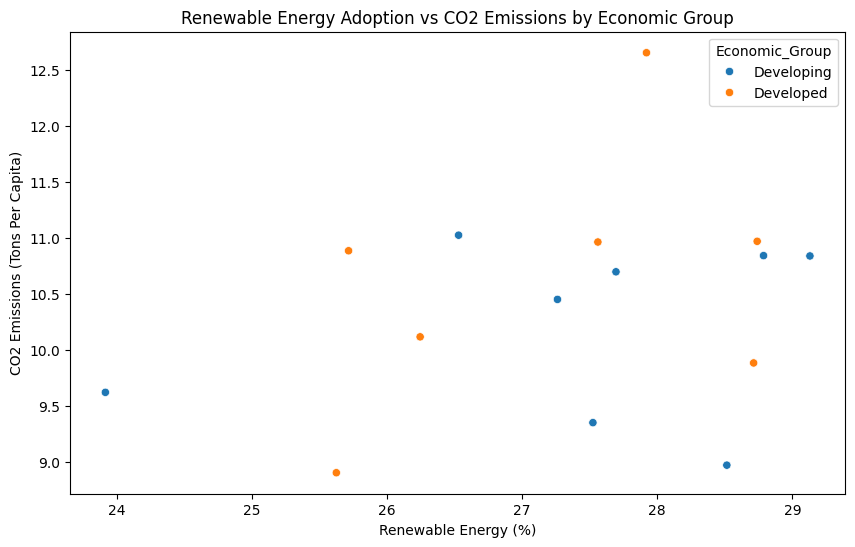

Developing correlation: 0.210, p-value: 0.617
Developed correlation: 0.402, p-value: 0.371


In [ ]:
developed = {'UK', 'France', 'Germany', 'USA', 'Canada', 'Japan', 'Australia'}
df['Economic_Group'] = df['Country'].apply(lambda x: 'Developed' if x in developed else 'Developing')

agg = df.groupby(['Country', 'Economic_Group']).agg({
    'Renewable Energy (%)': 'mean',
    'CO2 Emissions (Tons/Capita)': 'mean'
}).reset_index()

# Plot scatter with hue by Economic Group
plt.figure(figsize=(10,6))
sns.scatterplot(data=agg, x='Renewable Energy (%)', y='CO2 Emissions (Tons/Capita)', hue='Economic_Group')
plt.title('Renewable Energy Adoption vs CO2 Emissions by Economic Group')
plt.xlabel('Renewable Energy (%)')
plt.ylabel('CO2 Emissions (Tons Per Capita)')
plt.legend(title='Economic_Group')
plt.show()

# Calculate correlation for each group
for group in agg['Economic_Group'].unique():
    subset = agg[agg['Economic_Group'] == group]
    corr, p_val = pearsonr(subset['Renewable Energy (%)'], subset['CO2 Emissions (Tons/Capita)'])
    print(f'{group} correlation: {corr:.3f}, p-value: {p_val:.3g}')

### 6. Population Contribution to Global Emissions: High Population vs Industrialized Small Countries

/tmp/ipython-input-3671818653.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  emissions_population = df.groupby('Country').apply(


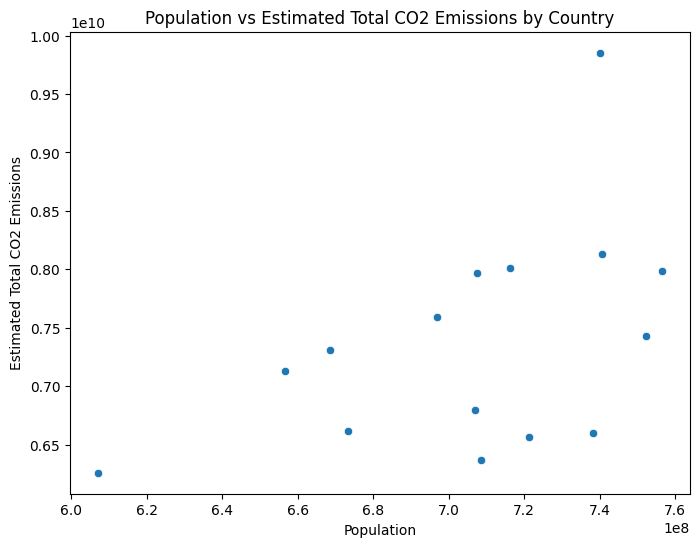

In [ ]:
emissions_population = df.groupby('Country').apply(
    lambda data: (data['CO2 Emissions (Tons/Capita)'] * data['Population']).mean()
).reset_index(name='Total Emissions Estimate')

population = df.groupby('Country')['Population'].mean().reset_index()

df_pop_emit = pd.merge(emissions_population, population, on='Country')

plt.figure(figsize=(8,6))
sns.scatterplot(x='Population', y='Total Emissions Estimate', data=df_pop_emit)
plt.title('Population vs Estimated Total CO2 Emissions by Country')
plt.xlabel('Population')
plt.ylabel('Estimated Total CO2 Emissions')
plt.show()

### 7. Correlation Between Rising Sea Levels and Frequency of Extreme Weather Events


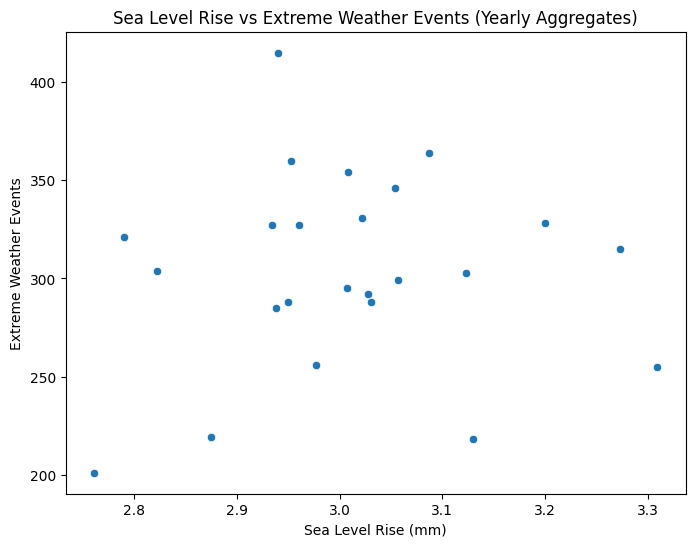

Correlation sea level rise & extreme events (yearly): 0.075, p=0.727


In [ ]:
agg_data = df.groupby('Year').agg({
    'Sea Level Rise (mm)': 'mean',
    'Extreme Weather Events': 'sum'
}).reset_index()

plt.figure(figsize=(8,6))
sns.scatterplot(x='Sea Level Rise (mm)', y='Extreme Weather Events', data=agg_data)
plt.title('Sea Level Rise vs Extreme Weather Events (Yearly Aggregates)')
plt.xlabel('Sea Level Rise (mm)')
plt.ylabel('Extreme Weather Events')
plt.show()

corr, p_val = pearsonr(agg_data['Sea Level Rise (mm)'], agg_data['Extreme Weather Events'])
print(f'Correlation sea level rise & extreme events (yearly): {corr:.3f}, p={p_val:.3f}')

### 8. Association Between Forest Area Percentage and Emissions or Temperature Rise


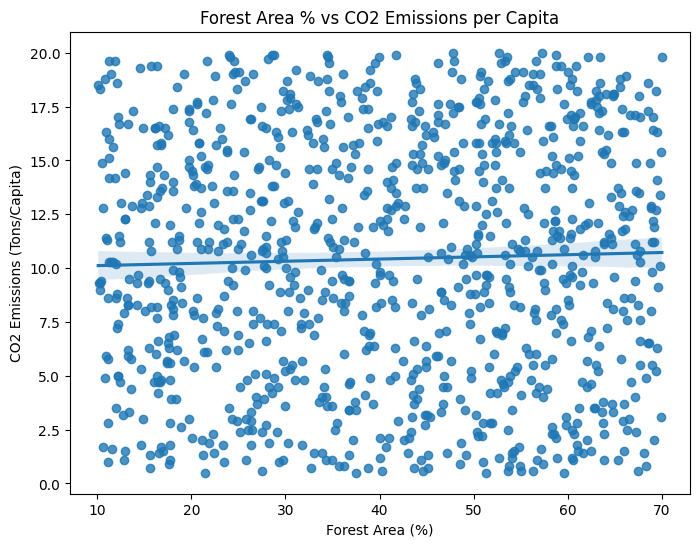

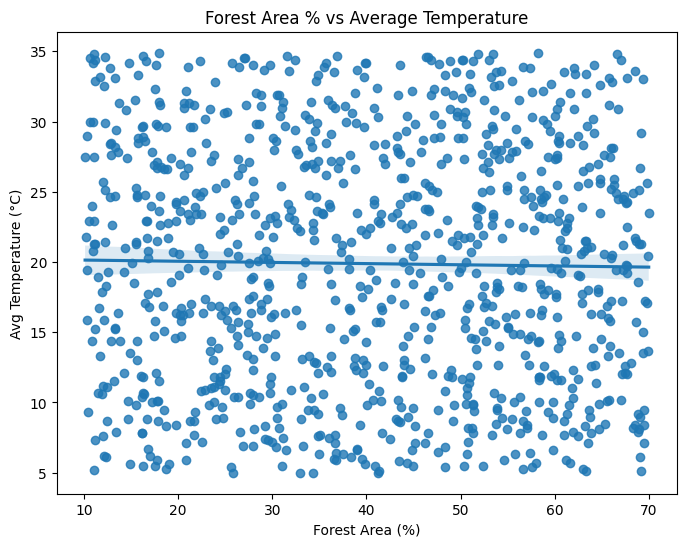

Corr Forest Area & CO2 Emissions: 0.031
Corr Forest Area & Avg Temperature: -0.017


In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(x='Forest Area (%)', y='CO2 Emissions (Tons/Capita)', data=df)
plt.title('Forest Area % vs CO2 Emissions per Capita')
plt.show()

plt.figure(figsize=(8,6))
sns.regplot(x='Forest Area (%)', y='Avg Temperature (°C)', data=df)
plt.title('Forest Area % vs Average Temperature')
plt.show()

corr_emissions, _ = pearsonr(df['Forest Area (%)'], df['CO2 Emissions (Tons/Capita)'])
corr_temp, _ = pearsonr(df['Forest Area (%)'], df['Avg Temperature (°C)'])
print(f'Corr Forest Area & CO2 Emissions: {corr_emissions:.3f}')
print(f'Corr Forest Area & Avg Temperature: {corr_temp:.3f}')


 ### 9. Countries Reducing Emissions While Increasing Renewables

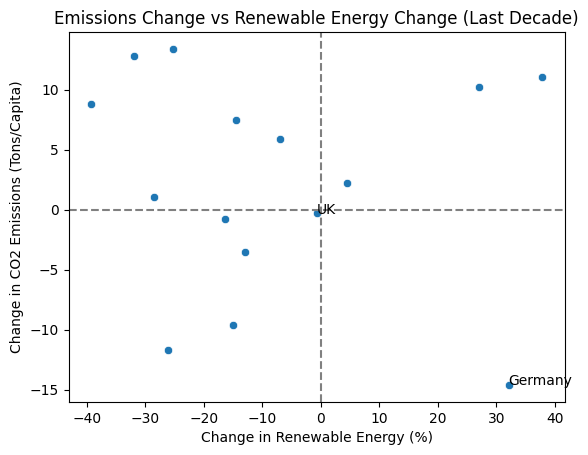

Countries reducing emissions while increasing renewables: ['Germany']


In [16]:
data_10yr = df[df['Year'] >= df['Year'].max() - 9]
agg = data_10yr.groupby('Country').agg({'CO2 Emissions (Tons/Capita)': ['first', 'last'],
                                       'Renewable Energy (%)': ['first', 'last']})
agg.columns = ['CO2_start', 'CO2_end', 'Renew_start', 'Renew_end']
agg['Emit_change'] = agg['CO2_end'] - agg['CO2_start']
agg['Renew_change'] = agg['Renew_end'] - agg['Renew_start']

sns.scatterplot(data=agg, x='Renew_change', y='Emit_change')
plt.axhline(0, linestyle='--', color='gray')
plt.axvline(0, linestyle='--', color='gray')
plt.title('Emissions Change vs Renewable Energy Change (Last Decade)')
plt.xlabel('Change in Renewable Energy (%)')
plt.ylabel('Change in CO2 Emissions (Tons/Capita)')


countries_to_label = ['Germany', 'UK']
for country in countries_to_label:
    if country in agg.index:
        plt.text(agg.loc[country, 'Renew_change'], agg.loc[country, 'Emit_change'], country)

plt.show()

print("Countries reducing emissions while increasing renewables:",
      agg[(agg['Emit_change'] < 0) & (agg['Renew_change'] > 0)].index.tolist())

### 10. Interaction of Extreme Events, Sea Level, Temperature in Vulnerable Regions


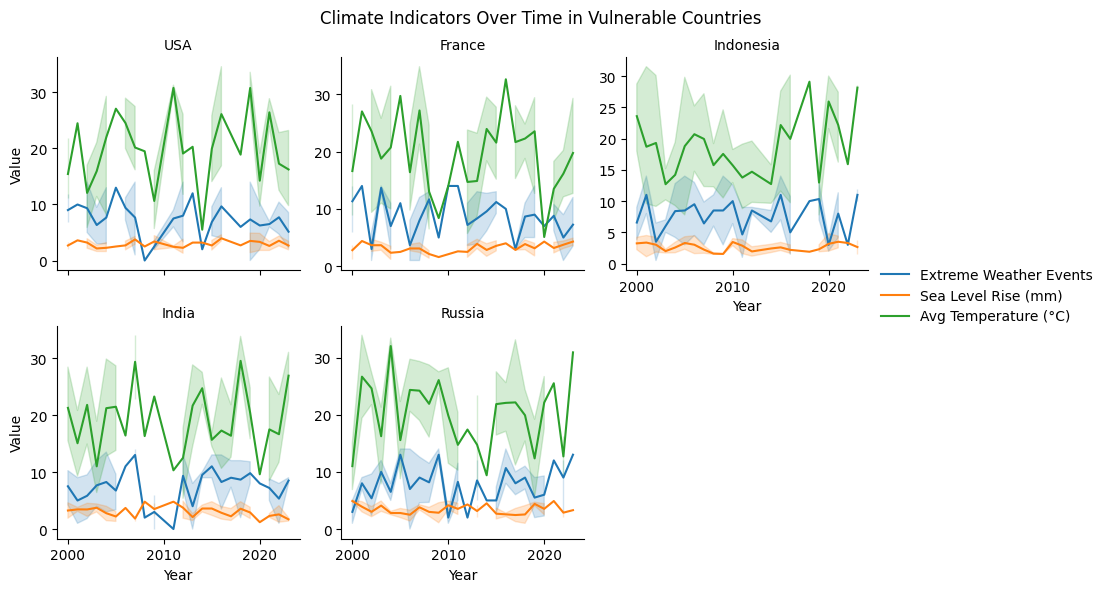

In [ ]:
vulnerable = df.groupby('Country')['Extreme Weather Events'].sum().nlargest(5).index
subset = df[df['Country'].isin(vulnerable)]

metrics = ['Extreme Weather Events', 'Sea Level Rise (mm)', 'Avg Temperature (°C)']
melted = subset.melt(id_vars=['Year', 'Country'], value_vars=metrics, var_name='Metric', value_name='Value')
g = sns.FacetGrid(melted, col='Country', col_wrap=3, height=3, sharex=True, sharey=False)
g.map_dataframe(sns.lineplot, x="Year", y="Value", hue="Metric")
g.add_legend()
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Climate Indicators Over Time in Vulnerable Countries')
plt.show()



### 11.Trends at Intersection of Forest Loss, Population Growth, and Emissions


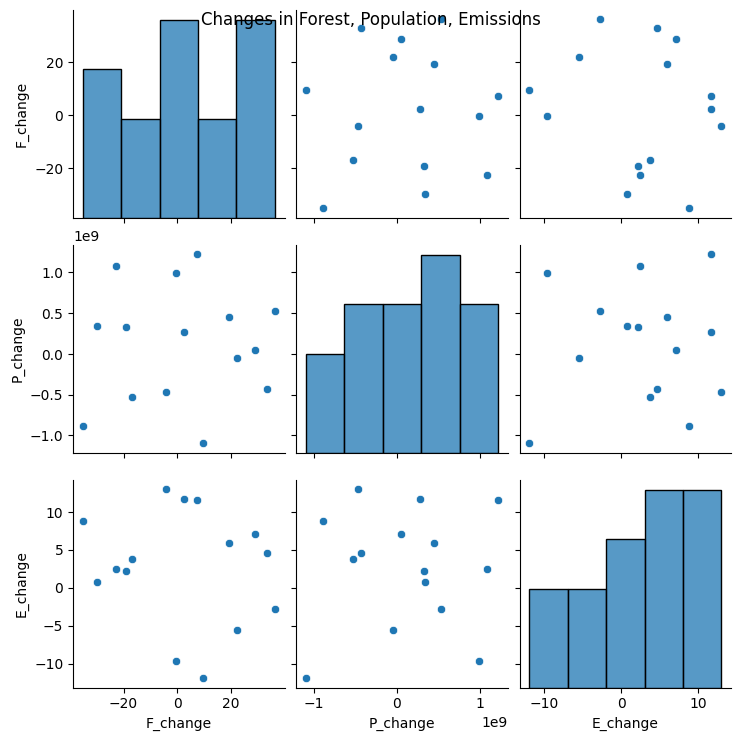

          F_change  P_change  E_change
F_change  1.000000  0.042653 -0.156042
P_change  0.042653  1.000000  0.046306
E_change -0.156042  0.046306  1.000000


In [ ]:
changes = df.groupby('Country').agg({
    'Forest Area (%)': ['first', 'last'],
    'Population': ['first', 'last'],
    'CO2 Emissions (Tons/Capita)': ['first', 'last']
})
changes.columns = ['F_start', 'F_end', 'P_start', 'P_end', 'E_start', 'E_end']
changes['F_change'] = changes['F_end'] - changes['F_start']
changes['P_change'] = changes['P_end'] - changes['P_start']
changes['E_change'] = changes['E_end'] - changes['E_start']

sns.pairplot(changes[['F_change', 'P_change', 'E_change']])
plt.suptitle('Changes in Forest, Population, Emissions')
plt.show()

print(changes[['F_change', 'P_change', 'E_change']].corr())


### 12. Countries with Declining Rainfall and Forest Area


Countries with declining rainfall and forest area: ['Australia', 'China', 'France', 'India', 'UK']


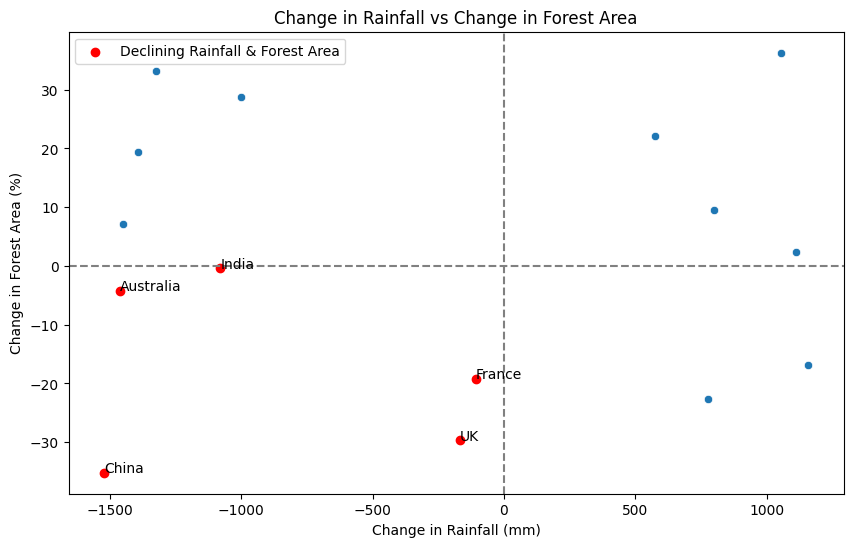

In [13]:
rf_changes = df.groupby('Country').agg({'Rainfall (mm)': ['first', 'last'],
                                         'Forest Area (%)': ['first', 'last']})
rf_changes.columns = ['R_start', 'R_end', 'F_start', 'F_end']
rf_changes['R_change'] = rf_changes['R_end'] - rf_changes['R_start']
rf_changes['F_change'] = rf_changes['F_end'] - rf_changes['F_start']

decliners = rf_changes[(rf_changes['R_change'] < 0) & (rf_changes['F_change'] < 0)]
print("Countries with declining rainfall and forest area:", decliners.index.tolist())

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rf_changes, x='R_change', y='F_change')
plt.scatter(decliners['R_change'], decliners['F_change'], color='red', label='Declining Rainfall & Forest Area')
plt.axhline(0, linestyle='--', color='gray')
plt.axvline(0, linestyle='--', color='gray')
plt.title('Change in Rainfall vs Change in Forest Area')
plt.xlabel('Change in Rainfall (mm)')
plt.ylabel('Change in Forest Area (%)')
plt.legend()

for i, country in enumerate(decliners.index):
    plt.text(decliners['R_change'].iloc[i], decliners['F_change'].iloc[i], country)

plt.show()

### 13. Regions with Sea Level Rise and Vulnerable Populations


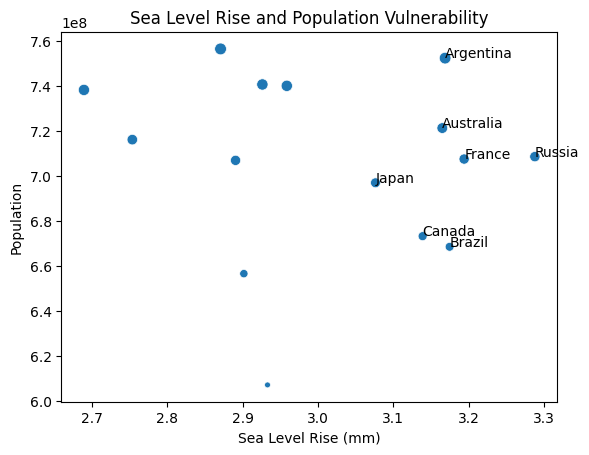

Countries with high sea level rise: ['Argentina', 'Australia', 'Brazil', 'Canada', 'France', 'Japan', 'Russia']


In [14]:
agg = df.groupby('Country').agg({'Sea Level Rise (mm)': 'mean', 'Population': 'mean'}).reset_index()
sns.scatterplot(x='Sea Level Rise (mm)', y='Population', size='Population', data=agg, legend=False)
plt.title('Sea Level Rise and Population Vulnerability')


high_sea_level_countries = agg[agg['Sea Level Rise (mm)'] > agg['Sea Level Rise (mm)'].mean()]
for i, country in enumerate(high_sea_level_countries['Country']):
    plt.text(high_sea_level_countries['Sea Level Rise (mm)'].iloc[i], high_sea_level_countries['Population'].iloc[i], country)

plt.show()

print("Countries with high sea level rise:",
      agg[agg['Sea Level Rise (mm)'] > agg['Sea Level Rise (mm)'].mean()]['Country'].tolist())

### 14. Patterns Between Continents or Economic Groups (G20, OECD)


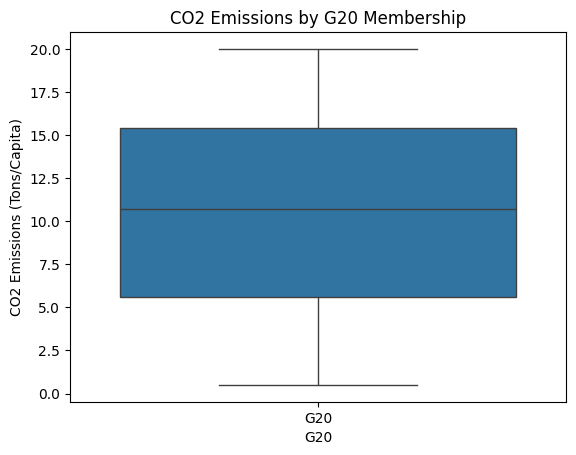

In [ ]:
g20 = {'Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India',
       'Indonesia', 'Japan', 'Mexico', 'Russia', 'South Africa', 'UK', 'USA'}
df['G20'] = df['Country'].apply(lambda x: 'G20' if x in g20 else 'Non-G20')

sns.boxplot(x='G20', y='CO2 Emissions (Tons/Capita)', data=df)
plt.title('CO2 Emissions by G20 Membership')
plt.show()



### 15. Trends Aligned with International Climate Policy Events


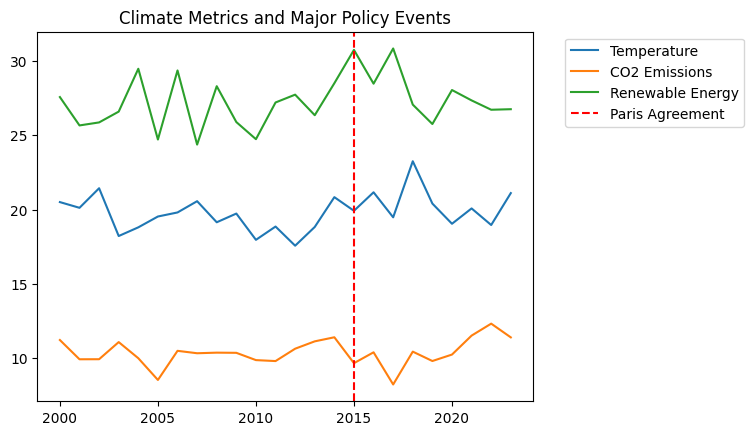

In [ ]:
yearly = df.groupby('Year').agg({'Avg Temperature (°C)': 'mean',
                                  'CO2 Emissions (Tons/Capita)': 'mean',
                                  'Renewable Energy (%)': 'mean'}).reset_index()

plt.plot(yearly['Year'], yearly['Avg Temperature (°C)'], label='Temperature')
plt.plot(yearly['Year'], yearly['CO2 Emissions (Tons/Capita)'], label='CO2 Emissions')
plt.plot(yearly['Year'], yearly['Renewable Energy (%)'], label='Renewable Energy')

plt.axvline(2015, color='red', linestyle='--', label='Paris Agreement')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Climate Metrics and Major Policy Events')
plt.show()